# Unity ML-Agents
## Environment Basics
This notebook contains a walkthrough of the basic functions of the Python API for Unity ML-Agents. For instructions on building a Unity environment, see [here](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Getting-Started-with-Balance-Ball.md).

### 1. Set environment parameters

Be sure to set `env_name` to the name of the Unity environment file you want to launch. Ensure that the environment build is in the `python/` directory.

In [1]:
env_name = "./env/env"  # Name of the Unity environment binary to launch
train_mode = True  # Whether to run the environment in training or inference mode

### 2. Load dependencies

The following loads the necessary dependencies and checks the Python version (at runtime). ML-Agents (v0.3 onwards) requires Python 3.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys

from unityagents import UnityEnvironment

%matplotlib inline

print("Python version:")
print(sys.version)

# check Python version
if (sys.version_info[0] < 3):
    raise Exception("ERROR: ML-Agents (v0.3 onwards) requires Python 3")

Python version:
3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]


### 3. Start the environment
`UnityEnvironment` launches and begins communication with the environment when instantiated.

Environments contain _brains_ which are responsible for deciding the actions of their associated _agents_. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
env = UnityEnvironment(file_name=env_name)

# Examine environment parameters
print(str(env))

# Set the default brain to work with
default_brain = env.brain_names[0]
brain = env.brains[default_brain]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: Brain
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 30
        Number of stacked Vector Observation: 4
        Vector Action space type: discrete
        Vector Action space size (per agent): 1
        Vector Action descriptions: 


Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: Brain
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 30
        Number of stacked Vector Observation: 4
        Vector Action space type: discrete
        Vector Action space size (per agent): 1
        Vector Action descriptions: 


### 4. Examine the observation and state spaces
We can reset the environment to be provided with an initial set of observations and states for all the agents within the environment. In ML-Agents, _states_ refer to a vector of variables corresponding to relevant aspects of the environment for an agent. Likewise, _observations_ refer to a set of relevant pixel-wise visuals for an agent.

Agent state looks like: 
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.


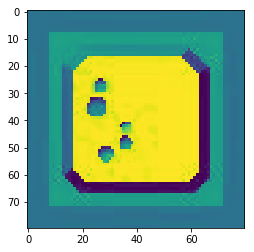

In [4]:
# Reset the environment
env_info = env.reset(train_mode=train_mode)[default_brain]

# Examine the state space for the default brain
print("Agent state looks like: \n{}".format(env_info.vector_observations[0]))

# Examine the observation space for the default brain
for observation in env_info.visual_observations:
    print("Agent observations look like:")
    if observation.shape[3] == 3:
        plt.imshow(observation[0,:,:,:])
    else:
        plt.imshow(observation[0,:,:,0])

### 5. Take random actions in the environment
Once we restart an environment, we can step the environment forward and provide actions to all of the agents within the environment. Here we simply choose random actions based on the `action_space_type` of the default brain. 

Once this cell is executed, 10 messages will be printed that detail how much reward will be accumulated for the next 10 episodes. The Unity environment will then pause, waiting for further signals telling it what to do next. Thus, not seeing any animation is expected when running this cell.

In [5]:
for episode in range(10):
    env_info = env.reset(train_mode=train_mode)[default_brain]
    done = False
    episode_rewards = 0
    while not done:
        if brain.vector_action_space_type == 'continuous':
            env_info = env.step(np.random.randn(len(env_info.agents), 
                                                brain.vector_action_space_size))[default_brain]
        else:
            env_info = env.step(np.random.randint(0, brain.vector_action_space_size, 
                                                  size=(len(env_info.agents))))[default_brain]
        episode_rewards += env_info.rewards[0]
        done = env_info.local_done[0]
    print("Total reward this episode: {}".format(episode_rewards))

Total reward this episode: 0.0
Total reward this episode: 0.0
Total reward this episode: 0.0
Total reward this episode: 0.0
Total reward this episode: 0.0
Total reward this episode: 0.0
Total reward this episode: 0.0
Total reward this episode: 0.0
Total reward this episode: 0.0
Total reward this episode: 0.0


### 6. Close the environment when finished
When we are finished using an environment, we can close it with the function below.

In [6]:
env.close()